In [ ]:
# !pip install tensorflow opencv-python matplotlib


import tensorflow as tf
import os

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import imghdr
import matplotlib.pyplot as plt


In [ ]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/Image Classification DataSet/new/' 

image_exts = ['jpeg','jpg', 'bmp', 'png']

dd = os.listdir(data_dir)
dd

['gm', 'relevent']

<function matplotlib.pyplot.show(close=None, block=None)>

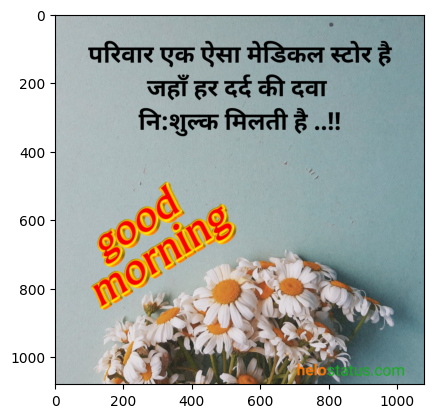

In [ ]:
dataa = '/content/drive/MyDrive/Colab Notebooks/Image Classification DataSet/new/gm/suprabhat-SMS.png'
img = cv2.imread(dataa)
img.shape
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show

In [ ]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

Image not in ext list /content/drive/MyDrive/Colab Notebooks/Image Classification DataSet/new/relevent/pilgrims-ghat-Phalgu-River-Bihar-India-Gaya.jpg
Image not in ext list /content/drive/MyDrive/Colab Notebooks/Image Classification DataSet/new/relevent/poor-people-in-india.jpg
Image not in ext list /content/drive/MyDrive/Colab Notebooks/Image Classification DataSet/new/relevent/Poverty_1672659305.webp
Image not in ext list /content/drive/MyDrive/Colab Notebooks/Image Classification DataSet/new/relevent/girl-Naga-Arunachal-Pradesh-India.jpg
Image not in ext list /content/drive/MyDrive/Colab Notebooks/Image Classification DataSet/new/relevent/94921710.jpg
Image not in ext list /content/drive/MyDrive/Colab Notebooks/Image Classification DataSet/new/relevent/bearded-indian-man-on-metro-260nw-789698539.jpg
Image not in ext list /content/drive/MyDrive/Colab Notebooks/Image Classification DataSet/new/relevent/Top-30-Most-Famous-Indian-People-of-All-Time-2.jpg
Image not in ext list /content/d

In [ ]:
dm = os.path.join(data_dir,'gm')
lst = os.listdir(dm) # your directory path
number_files = len(lst)
print(number_files)

448


In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/Image Classification DataSet/new/')

Found 867 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

batch = data_iterator.next()

len(batch)
batch[0].shape
batch[1]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0], dtype=int32)

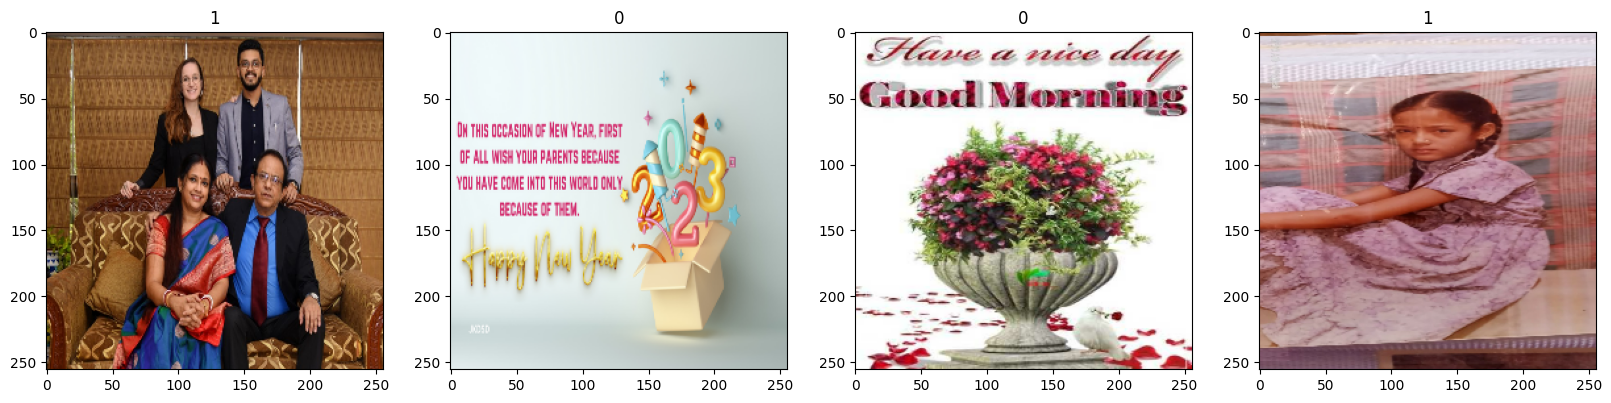

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Class 0 = Gm msgs
# Class 1 = Relevent imgs (each bach has 2 dim 0-image, 1-Class 0 or 1)

*PREPROCESSING*

In [ ]:
data = data.map(lambda x,y: (x/255, y))

scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
batch[0].min()

0.0

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

len(test)

2

# DEEP LEARNING

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# TRAIN

In [ ]:
logdir='logs'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
19/19 [==============================] - 29s 695ms/step - loss: 0.7703 - accuracy: 0.5345 - val_loss: 0.6150 - val_accuracy: 0.6000
Epoch 2/20
19/19 [==============================] - 16s 727ms/step - loss: 0.5352 - accuracy: 0.7138 - val_loss: 0.4095 - val_accuracy: 0.8500
Epoch 3/20
19/19 [==============================] - 18s 857ms/step - loss: 0.4938 - accuracy: 0.7895 - val_loss: 0.4126 - val_accuracy: 0.8313
Epoch 4/20
19/19 [==============================] - 19s 865ms/step - loss: 0.3288 - accuracy: 0.8602 - val_loss: 0.2707 - val_accuracy: 0.9000
Epoch 5/20
19/19 [==============================] - 15s 737ms/step - loss: 0.1892 - accuracy: 0.9227 - val_loss: 0.2087 - val_accuracy: 0.9125
Epoch 6/20
19/19 [==============================] - 19s 858ms/step - loss: 0.1459 - accuracy: 0.9391 - val_loss: 0.1609 - val_accuracy: 0.9250
Epoch 7/20
19/19 [==============================] - 19s 858ms/step - loss: 0.0836 - accuracy: 0.9720 - val_loss: 0.1083 - val_accuracy: 0.9688

# PLOTTING

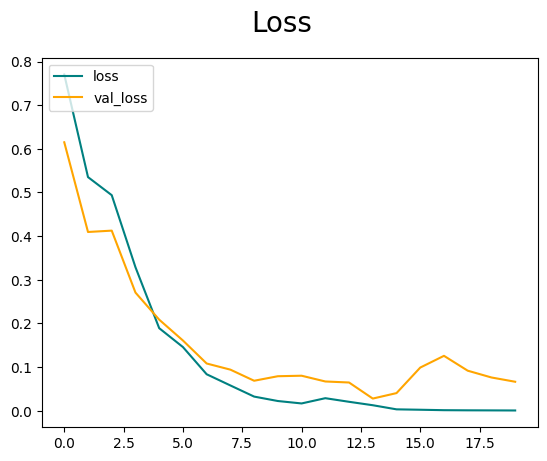

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

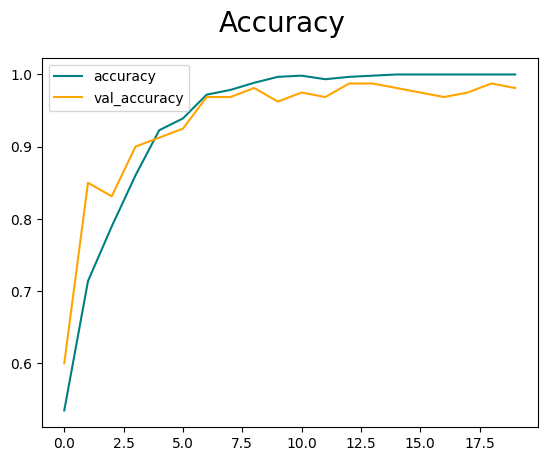

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# EVALUATING PERFORMANCE

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
len(test)
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 32ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# TEST

In [ ]:
img = cv2.imread('5.jpg')
plt.imshow(img)
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
import numpy as np
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat
# if yhat > 0.5: 
#     print(f'Predicted class is Relevent')
# else:
#     print(f'Predicted class is Meme')

1/1 [==============================] - 0s 21ms/step


array([[0.9995703]], dtype=float32)

# SAVING

In [ ]:
from tensorflow.keras.models import load_model

model.save(os.path.join('models','imageclassifier_new.h5'))

new_model = load_model(os.path.join('models','imageclassifier_new.h5'))

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 19ms/step


array([[0.9998418]], dtype=float32)